# Analisi dati ultimo giorno disponibile
I dati elaborati sono quelli presenti nel file * dpc-covid19-ita-regioni.json * nella directory * dati-json *.

### Nella cella sottostante viene creato il dataset e mostrata una visione tabellare dello stesso.

In [1]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()

dataset = pd.read_json('../dati-json/dpc-covid19-ita-regioni.json')
dataset['data'] = pd.to_datetime(dataset['data'])
dataset.set_index('data', inplace=True)

max_date = dataset.index.max()
subset = dataset.loc[[max_date], ['denominazione_regione', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening', 'totale_casi', 'tamponi', 'casi_testati']]

subset

,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
data,,,,,,,,,,,,,,,
2021-06-19 17:00:00,Abruzzo,42,1,43,1212,1255,-22,35,70837,2509,NaN,NaN,74601,1654456,677828.0
2021-06-19 17:00:00,Basilicata,33,0,33,1799,1832,-903,13,24371,588,NaN,NaN,26791,386267,208086.0
2021-06-19 17:00:00,Calabria,100,11,111,6794,6905,-116,111,60481,1219,NaN,NaN,68605,910298,835580.0
2021-06-19 17:00:00,Campania,296,20,316,10305,10621,-151,139,405295,7383,NaN,NaN,423299,5158527,3258292.0
2021-06-19 17:00:00,Emilia-Romagna,233,39,272,5490,5762,-232,93,367185,13245,NaN,NaN,386192,6556503,1894310.0
2021-06-19 17:00:00,Friuli Venezia Giulia,4,1,5,4473,4478,-36,15,99192,3799,NaN,NaN,107469,2121754,709382.0
2021-06-19 17:00:00,Lazio,320,77,397,3962,4359,-115,101,332483,8304,NaN,NaN,345146,7401796,4419215.0
2021-06-19 17:00:00,Liguria,35,8,43,248,291,5,14,98497,4345,NaN,NaN,103133,1703688,665770.0
2021-06-19 17:00:00,Lombardia,402,80,482,13105,13587,-245,183,793206,33751,NaN,NaN,840544,11288625,4486360.0


** Setup base della libreria di renderizzazione dei grafici. **

In [2]:
import matplotlib.pyplot as plt 

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)
default_figsize = (30, 10)
default_titlesize = 25
default_padding = 15
default_labelsize = 20
default_labelpos = 'offset points'
default_labelxy = (35, -7)

## Ricoverati con sintomi

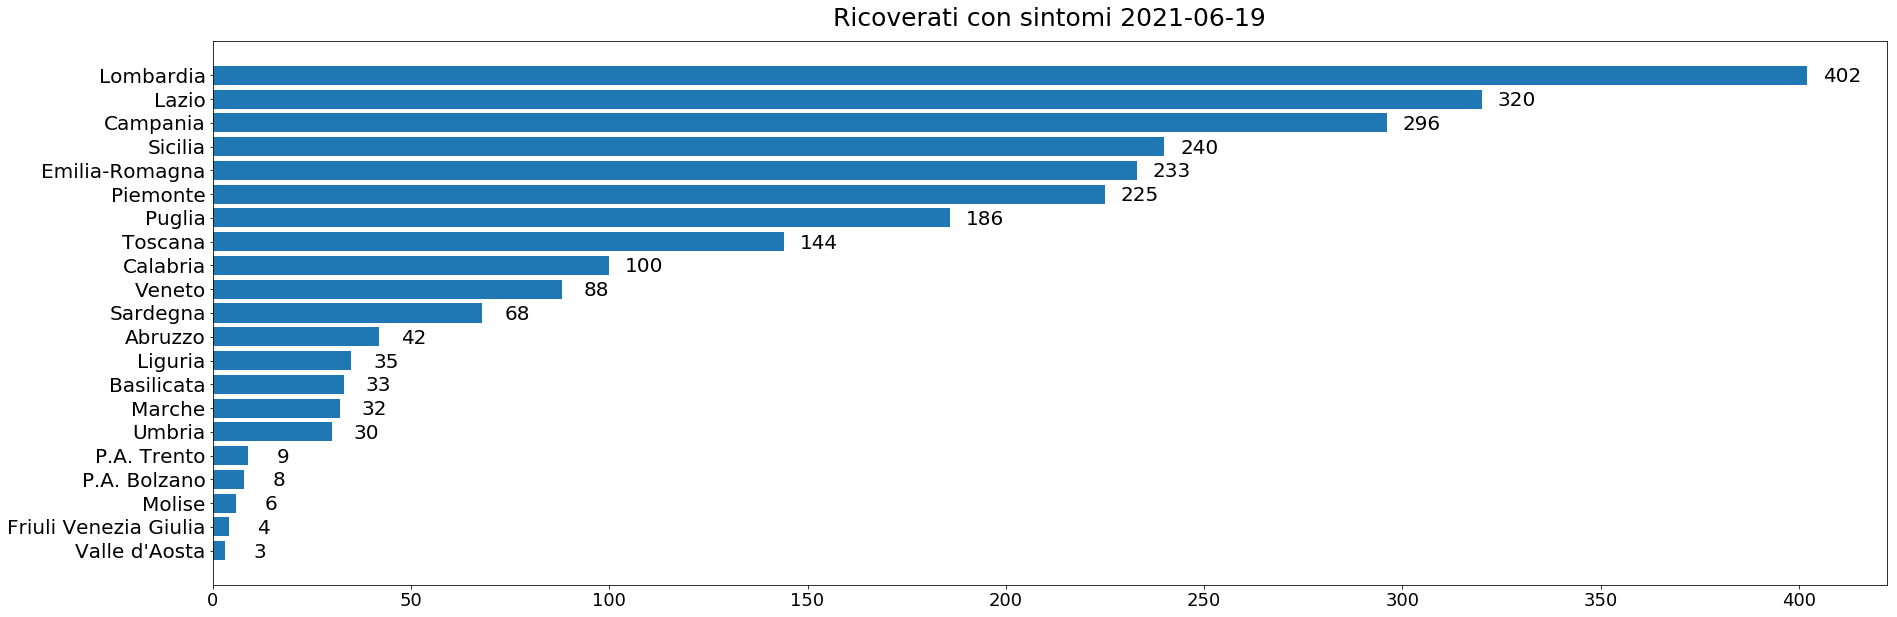

In [3]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['ricoverati_con_sintomi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.ricoverati_con_sintomi.values)
plt.title('Ricoverati con sintomi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.ricoverati_con_sintomi.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Occupazione attuale delle terapie intensive

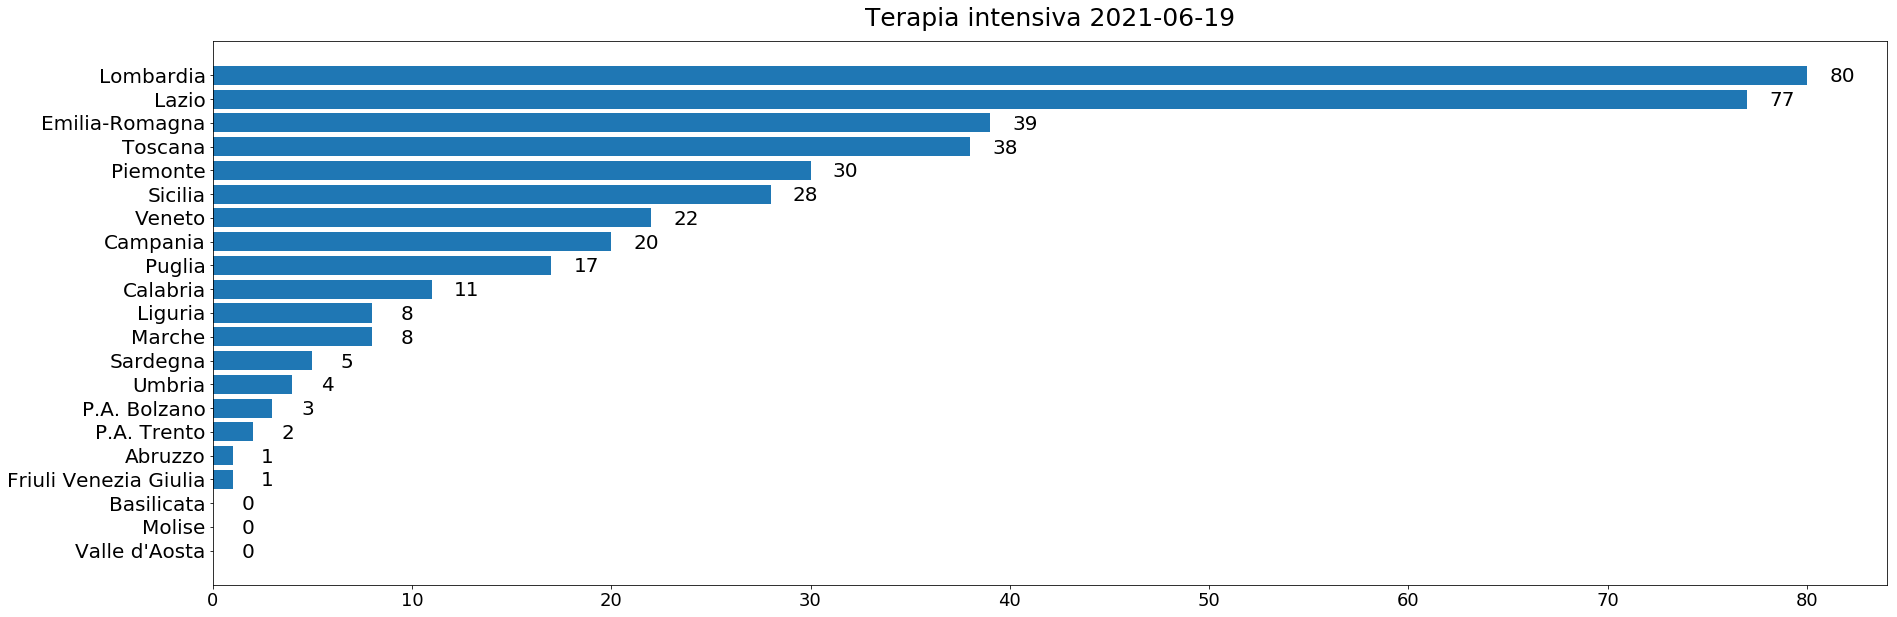

In [4]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['terapia_intensiva'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.terapia_intensiva.values)
plt.title('Terapia intensiva {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.terapia_intensiva.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Totale dei pazienti attualmente ospedalizzati

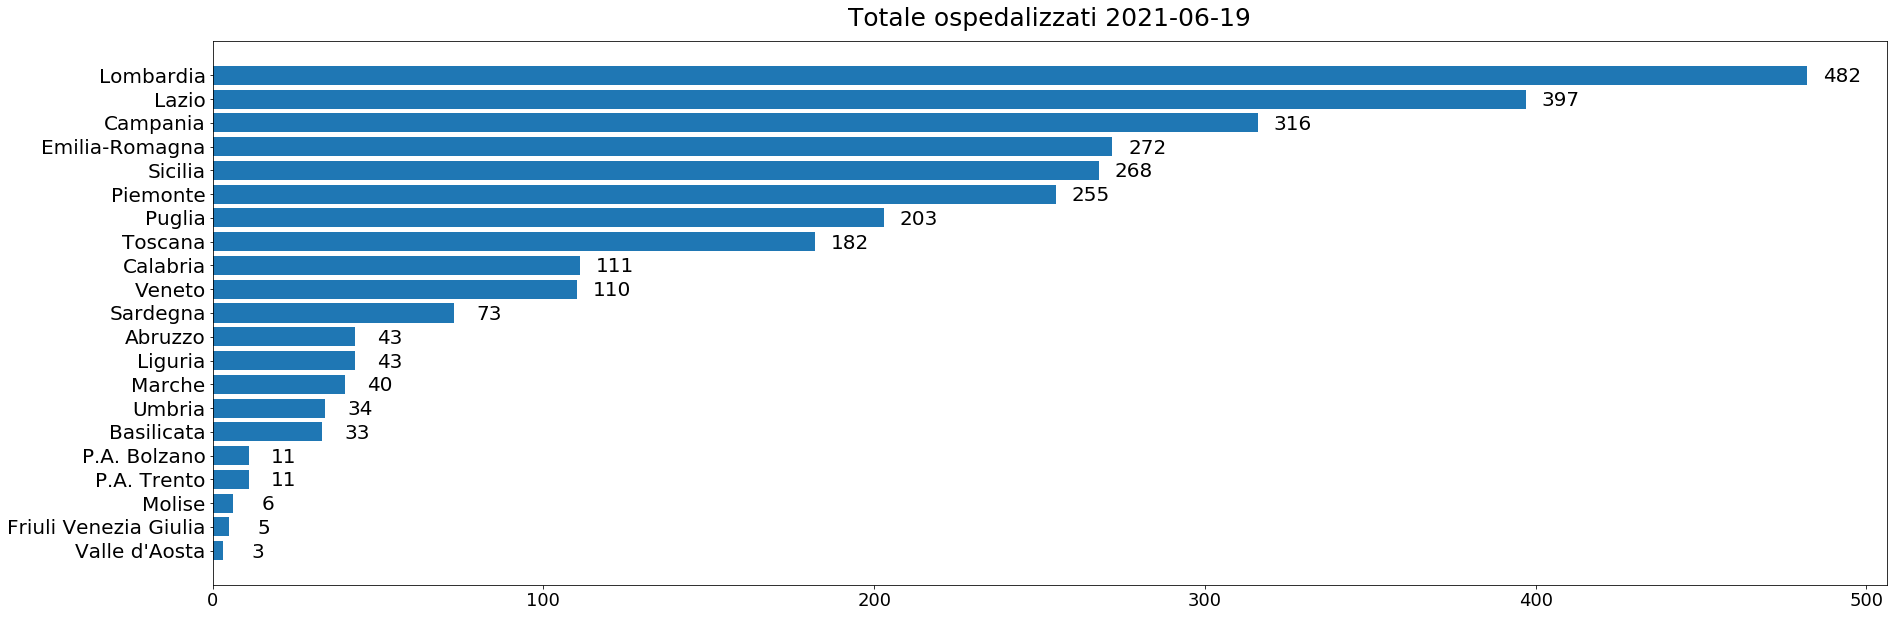

In [5]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['totale_ospedalizzati'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.totale_ospedalizzati.values)
plt.title('Totale ospedalizzati {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.totale_ospedalizzati.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Totale delle persone in isolamento domiciliare

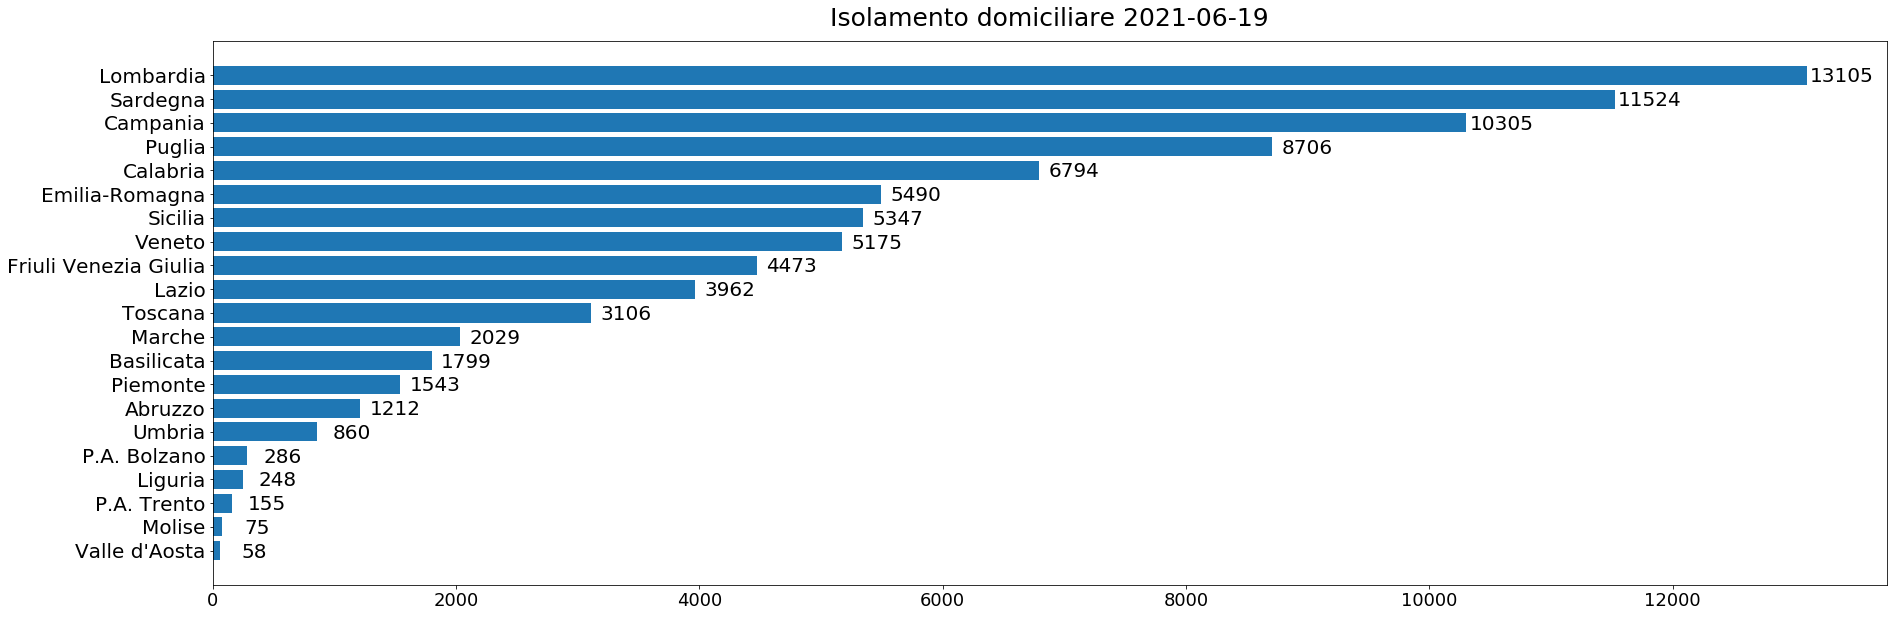

In [6]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['isolamento_domiciliare'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.isolamento_domiciliare.values)
plt.title('Isolamento domiciliare {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.isolamento_domiciliare.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Totale positivi
Calcolati con la formula: $ totale\_ospedalizzati + isolamento\_domiciliare $

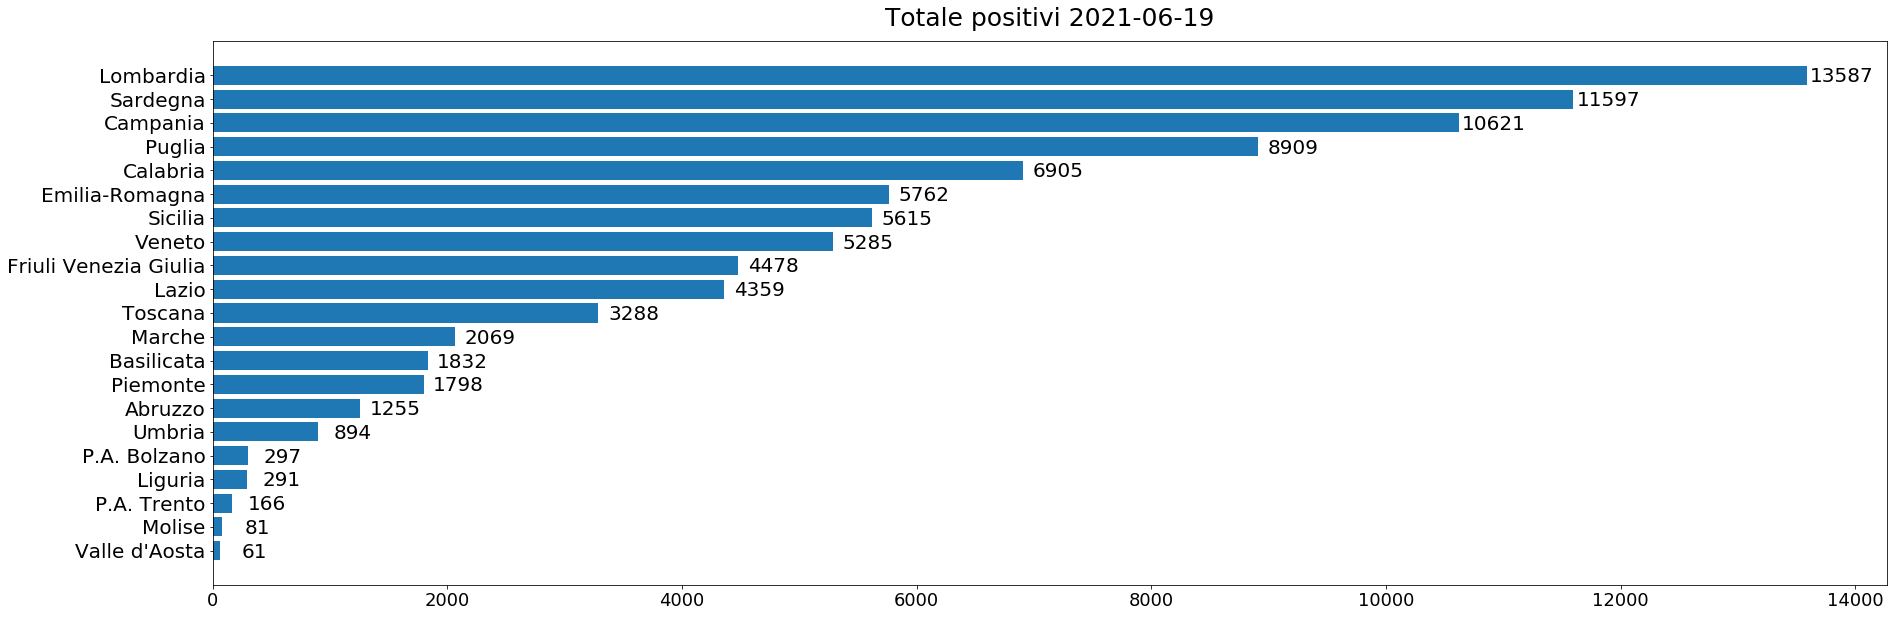

In [7]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['totale_positivi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.totale_positivi.values)
plt.title('Totale positivi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.totale_positivi.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Variazione totale positivi

Calcolati con la formula: $ totale\_positivi\ giorno\ corrente - totale\_positivi\ giorno\ precedente $


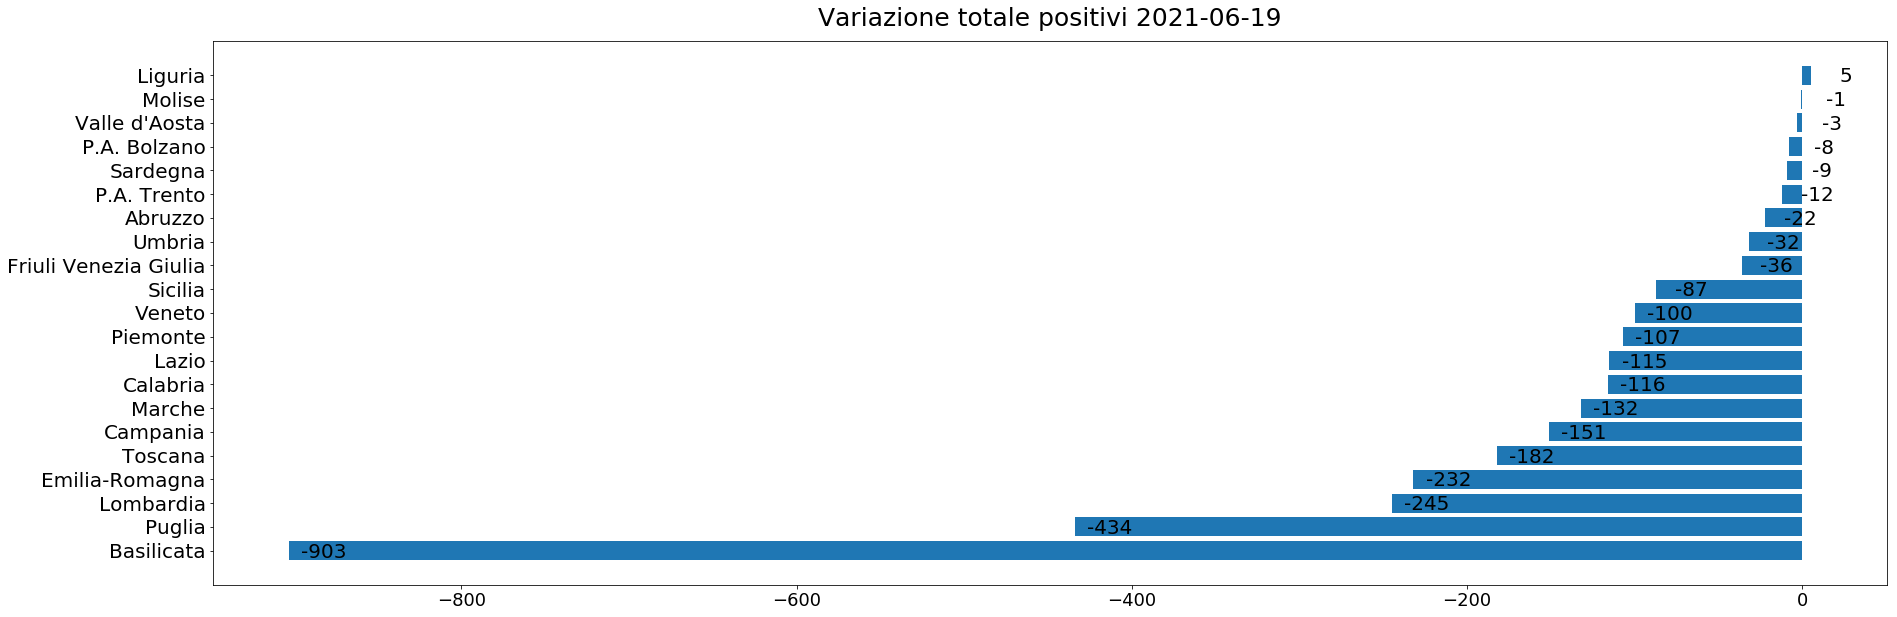

In [8]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['variazione_totale_positivi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.variazione_totale_positivi.values)
plt.title('Variazione totale positivi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.variazione_totale_positivi.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Nuovi positivi

Calcolati con la formula: $ totale\_casi\ giorno\ corrente - totale\_casi\ giorno\ precedente $

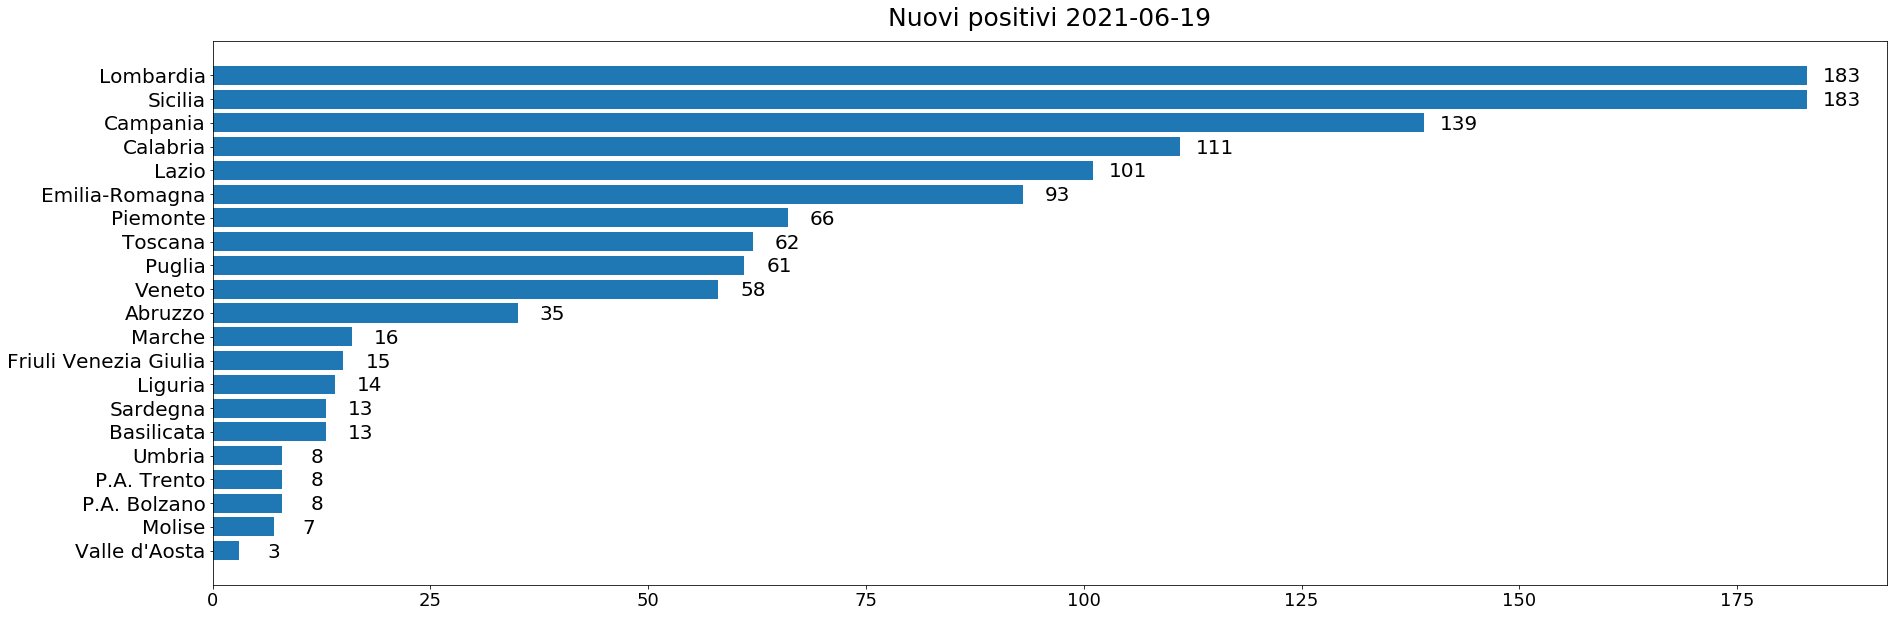

In [9]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['nuovi_positivi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.nuovi_positivi.values)
plt.title('Nuovi positivi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.nuovi_positivi.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Dimessi guariti

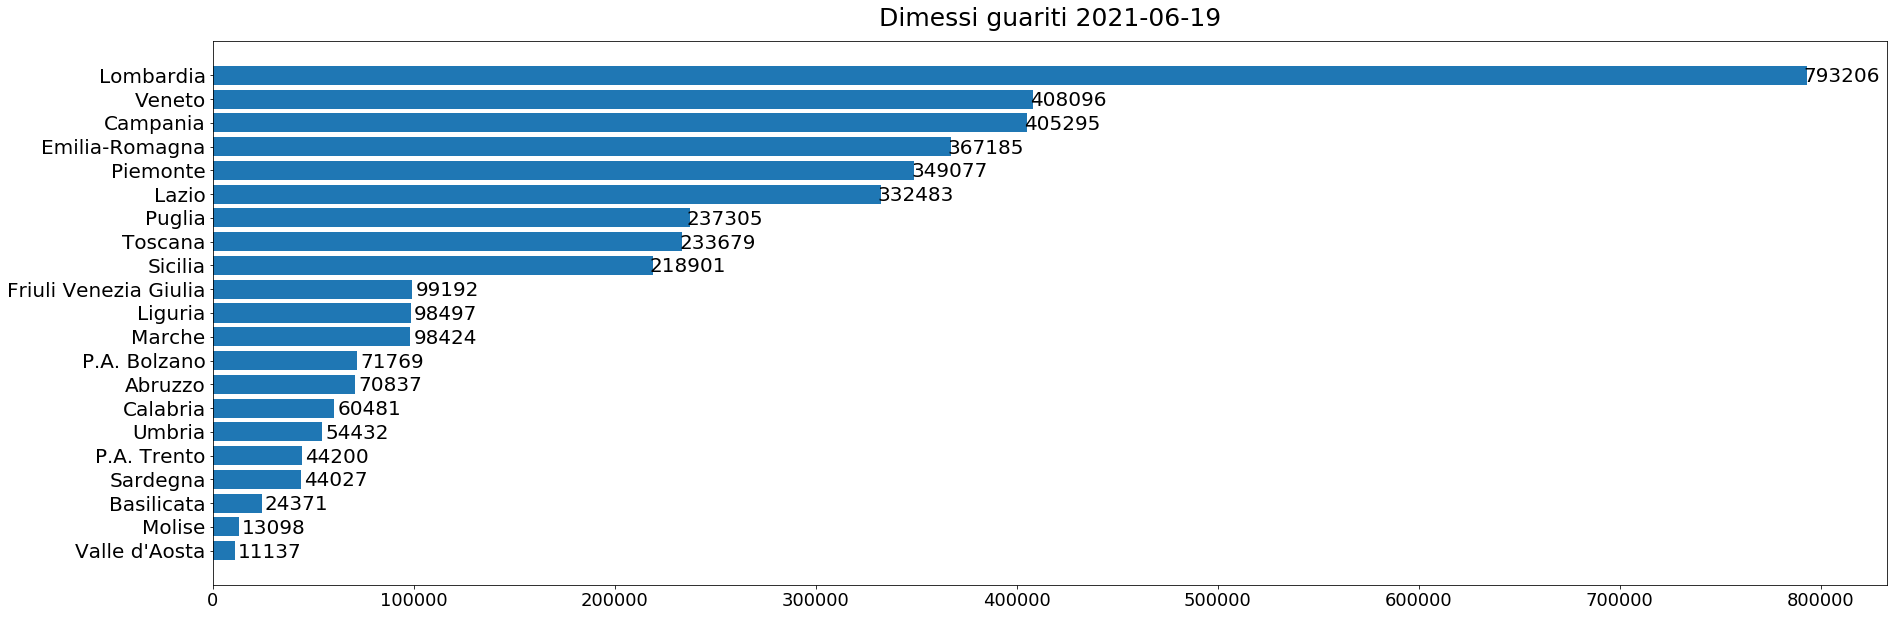

In [10]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['dimessi_guariti'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.dimessi_guariti.values)
plt.title('Dimessi guariti {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.dimessi_guariti.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Deceduti

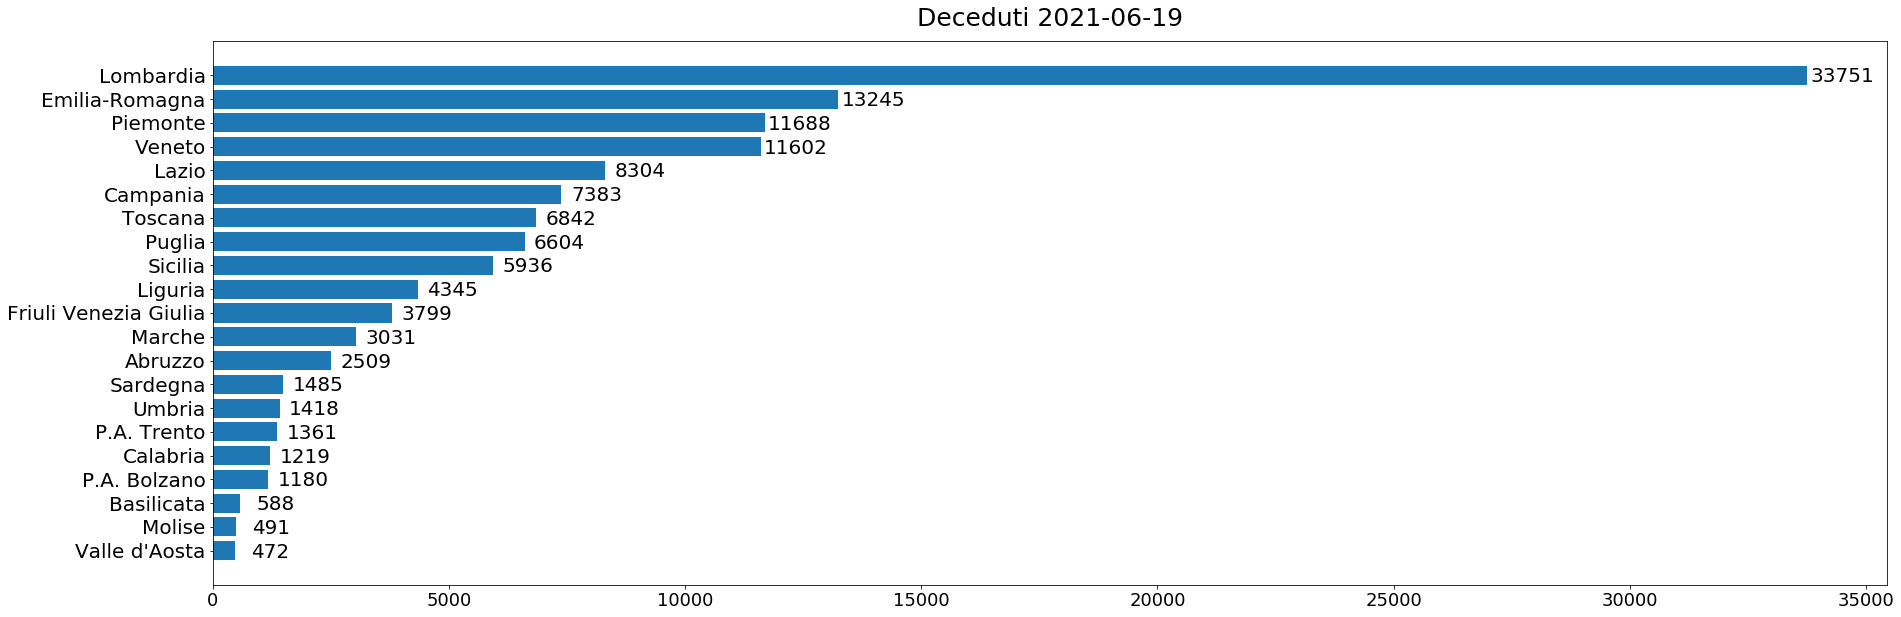

In [11]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['deceduti'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.deceduti.values)
plt.title('Deceduti {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.deceduti.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Casi da sospetto diagnostico

Casi positivi al tampone emersi da attività clinica.

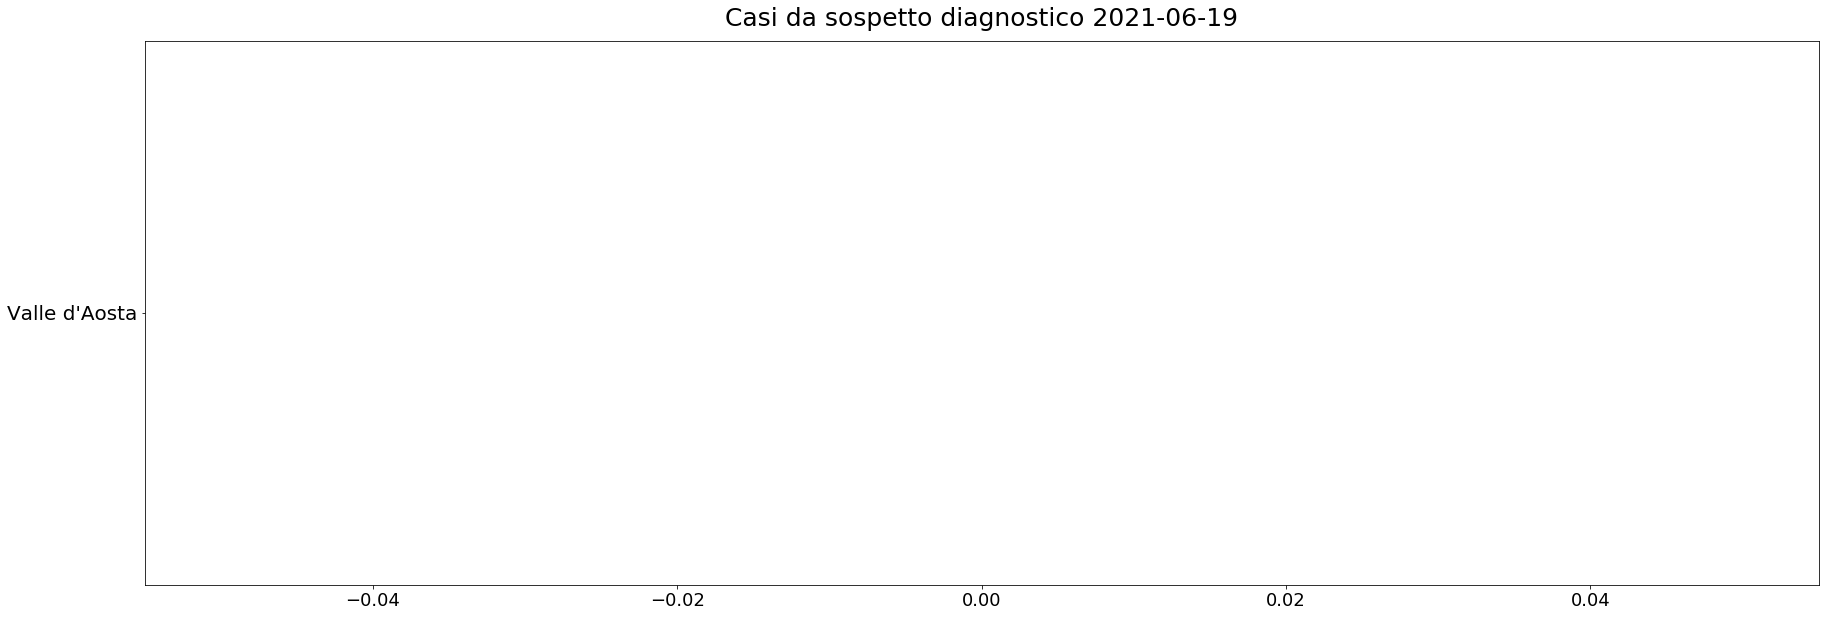

In [12]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['casi_da_sospetto_diagnostico'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.casi_da_sospetto_diagnostico.values)
plt.title('Casi da sospetto diagnostico {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.casi_da_sospetto_diagnostico.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Casi da screening

Casi positivi emersi da indagini e test, pianificati a livello nazionale o regionale.

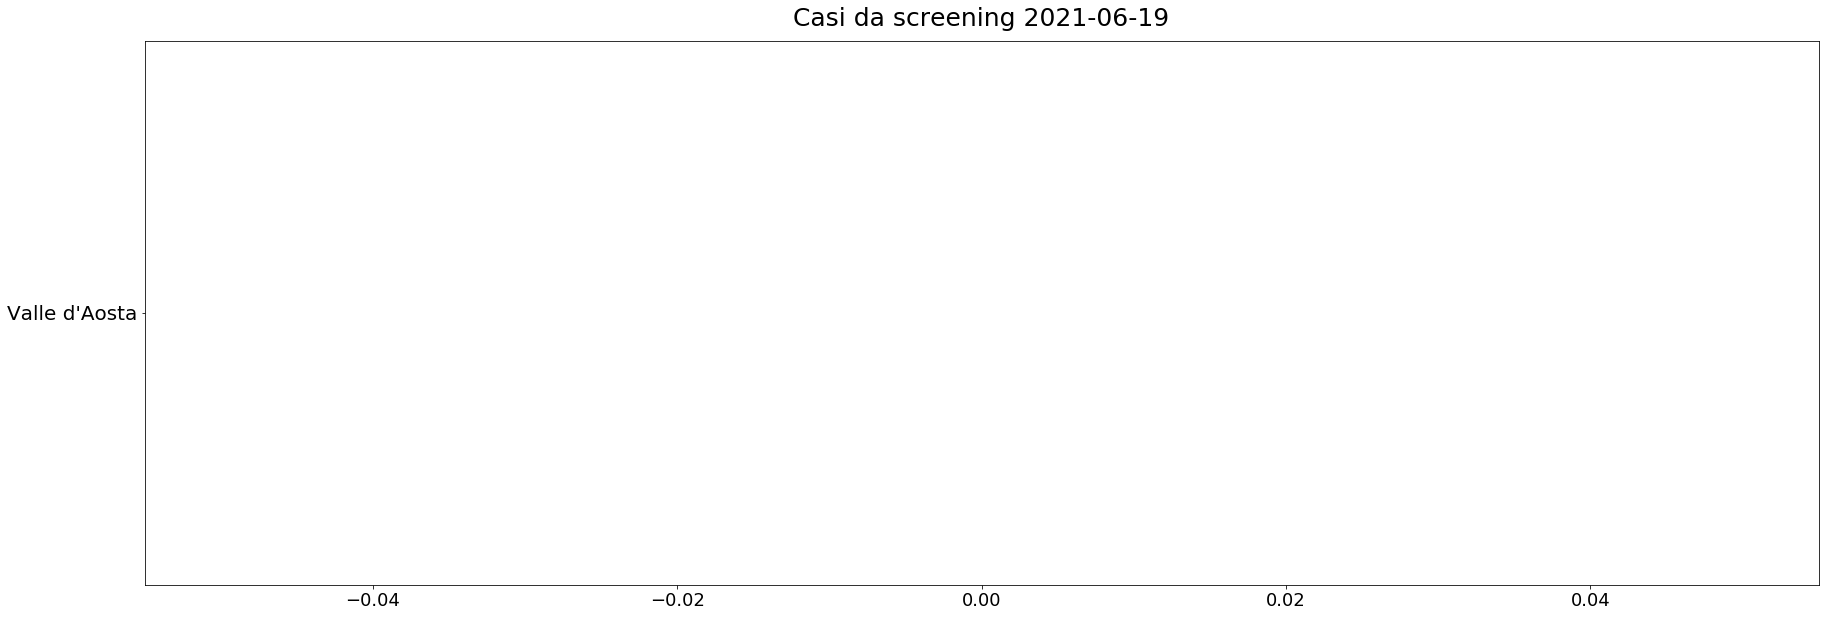

In [13]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['casi_da_screening'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.casi_da_screening.values)
plt.title('Casi da screening {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.casi_da_screening.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Totale casi

Totale casi positivi.

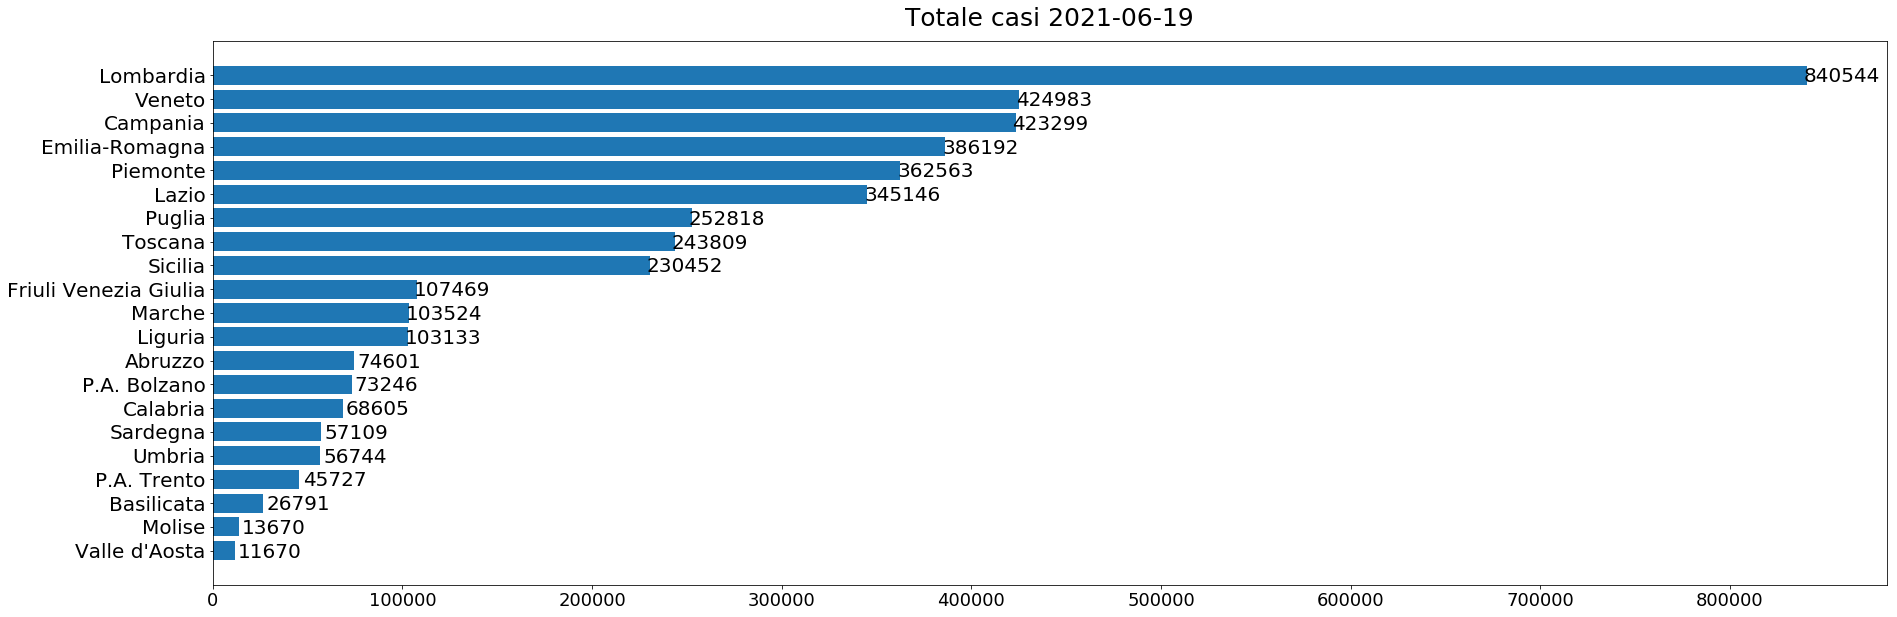

In [14]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['totale_casi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.totale_casi.values)
plt.title('Totale casi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.totale_casi.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Tamponi

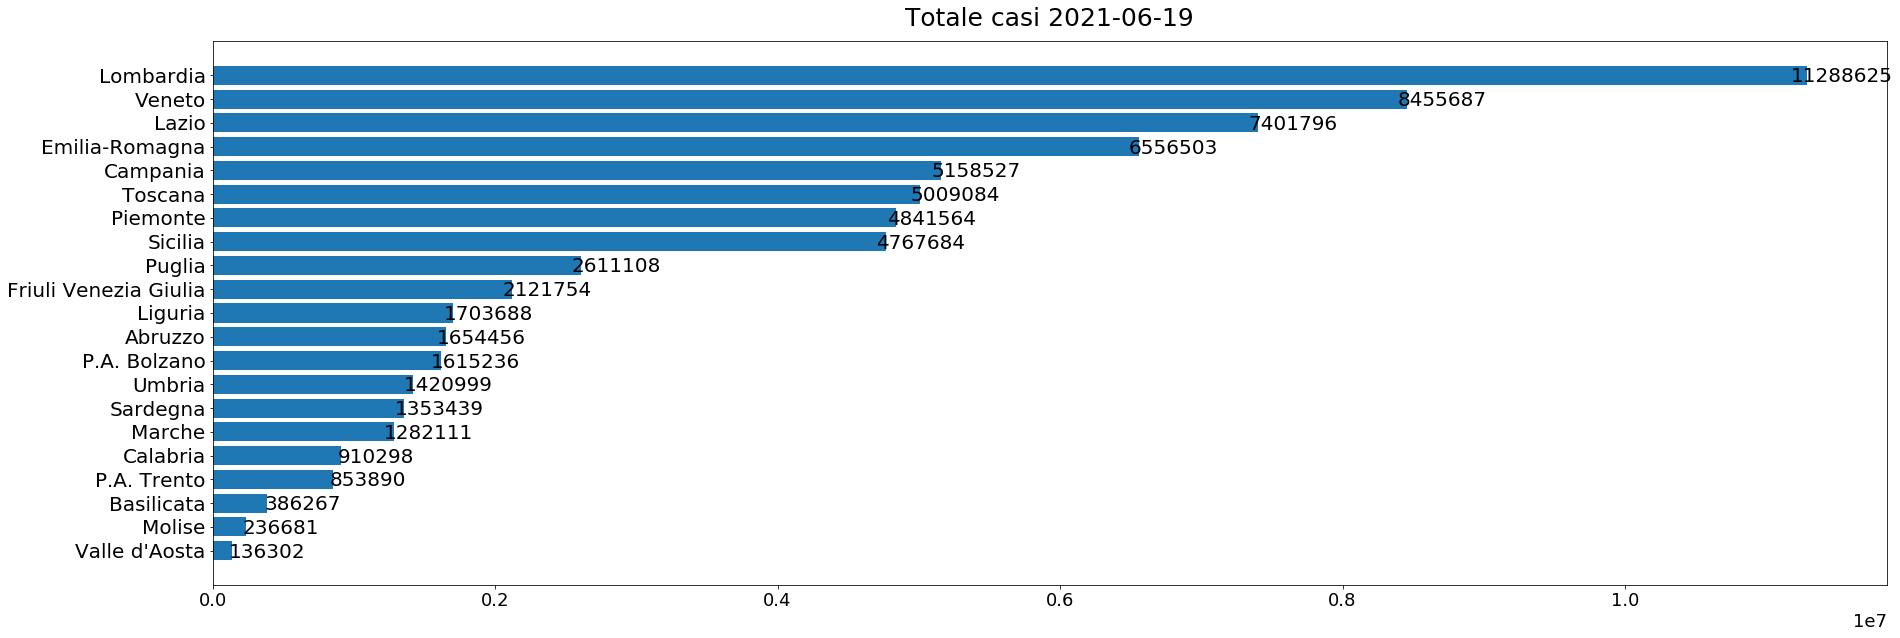

In [15]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['tamponi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.tamponi.values)
plt.title('Totale casi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.tamponi.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Casi testati

Totale dei soggetti sottoposti al test.

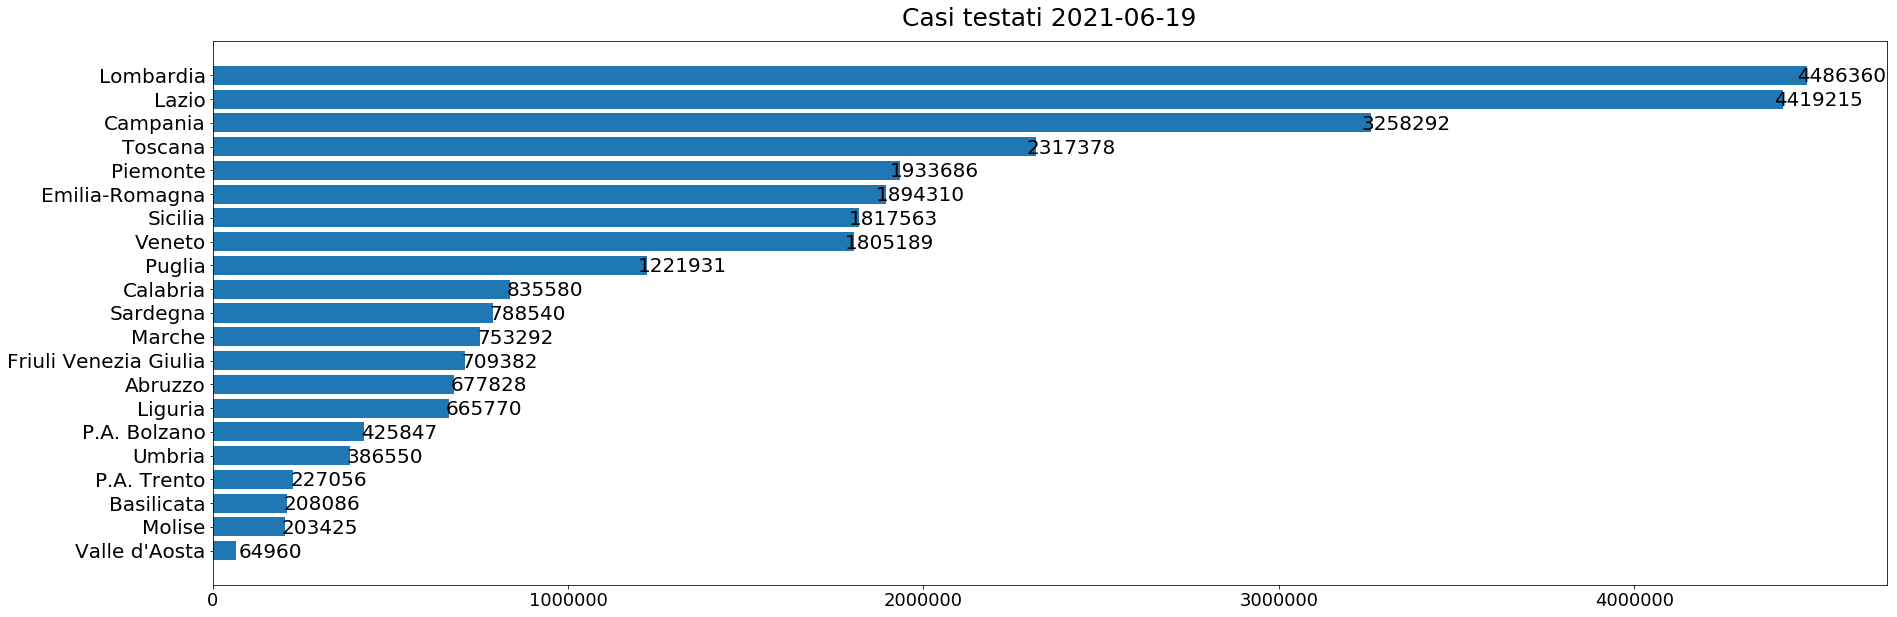

In [16]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['casi_testati'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.casi_testati.values)
plt.title('Casi testati {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.casi_testati.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()